In [19]:
import torch
import torch.nn as nn
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()


Saving 058.jpg to 058 (3).jpg
Saving 057.jpg to 057 (3).jpg
Saving 046.jpg to 046 (3).jpg
Saving 045.jpg to 045 (3).jpg
Saving 022.jpg to 022 (3).jpg
Saving 021.jpg to 021 (3).jpg
Saving 010.jpg to 010 (3).jpg
Saving 009.jpg to 009 (3).jpg
Saving 005.jpg to 005 (3).jpg
Saving 004.jpg to 004 (3).jpg


In [32]:
# ------------------------- #
#      Image Loading        #
# ------------------------- #

def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)    # convert to grayscale
    img = cv2.resize(img, (256,256))                # resizing it to 128 x 128 for a more managable data respecting the constraints
    img = img.astype(np.float32) / 255.0            # normalization
    img = np.expand_dims(img, axis=(0,1))           # adding the branch and channel values
    return torch.from_numpy(img)


In [40]:
# -------------------------
# CNN Model
# -------------------------

class DeepCNN(nn.Module):

    def __init__(self, activation="relu"):
        super(DeepCNN, self).__init__()

        self.blocks = nn.ModuleList([
            nn.Sequential(nn.Conv2d( 1, 32, 3, padding=1), nn.ReLU()),
            nn.Sequential(nn.Conv2d(32, 32, 3, padding=1), nn.ReLU()),
            nn.Sequential(nn.Conv2d(32, 32, 3, padding=1), nn.ReLU()),
            nn.Sequential(nn.Conv2d(32, 32, 3, padding=1), nn.ReLU()),
            nn.Sequential(nn.Conv2d(32, 32, 3, padding=1), nn.ReLU())
        ])

        self.flatten = nn.Flatten()               # flatens the 3D into 1D
        self.fc = nn.Linear(32 * 256 * 256 , 64)   # creates a fully connected layer

        if activation == "relu":
            self.out_act = nn.ReLU()
        elif activation == "leakyrelu":
            self.out_act = nn.LeakyReLU(0.01)
        else:
            self.out_act = nn.Tanh()

    def forward(self, x):

        feature_maps = []

        for block in self.blocks:
            x = block(x)
            feature_maps.append(x)

        x = self.flatten(x)
        x = self.fc(x)
        out = self.out_act(x)

        return out, feature_maps


In [26]:
# -------------------------
# Feature Map Visualization
# -------------------------

def visualize_pipeline(input_img, feature_maps, final_output):

    plt.figure(figsize=(18,4))

    # Input Image
    plt.subplot(1,7,1)
    plt.title("Input")
    plt.imshow(input_img, cmap="gray")
    plt.axis("off")

    # Intermediate Feature Maps (pick first channel from each block)
    for i in range(5):
        fmap = feature_maps[i][0,0].detach().numpy()

        plt.subplot(1,7,i+2)
        plt.title(f"Block {i+1}")
        plt.imshow(fmap, cmap="gray")
        plt.axis("off")

    # Final Output
    out_img = final_output[0].detach().numpy()

    plt.subplot(1,7,7)
    plt.title("Output")
    plt.plot(out_img)   # FC output is vector
    plt.axis("off")

    plt.show()



In [39]:
# -------------------------
# Run Experiment
# -------------------------

def run_model(image_path, activation_type):
    img_tensor = load_image(image_path)
    model = DeepCNN(activation=activation_type)

    with torch.no_grad():
        output, feature_maps = model(img_tensor)

    print(f"\nActivation Used: {activation_type}")
    print("Output Vector Shape:", output.shape)

    visualize_pipeline(img_tensor[0,0].numpy(), feature_maps, output)







Activation Used: relu
Output Vector Shape: torch.Size([1, 64])


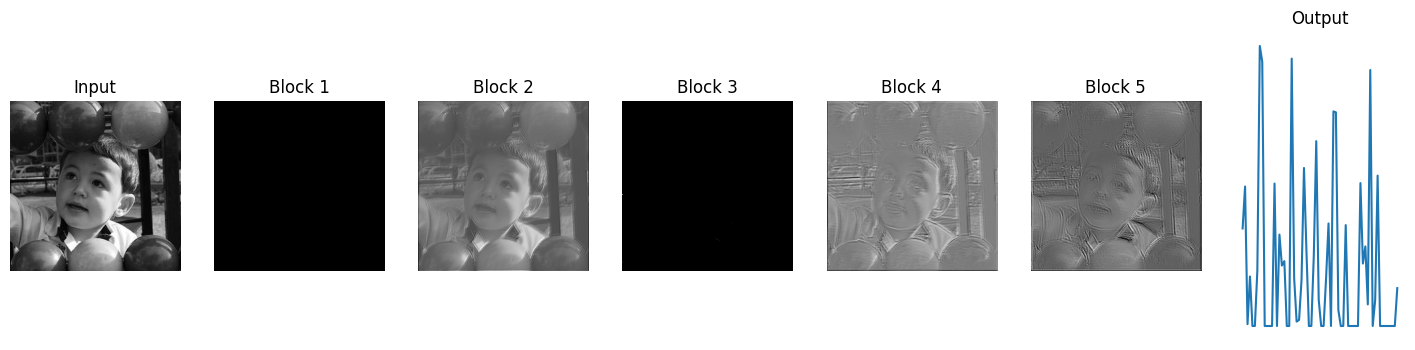


Activation Used: leakyrelu
Output Vector Shape: torch.Size([1, 64])


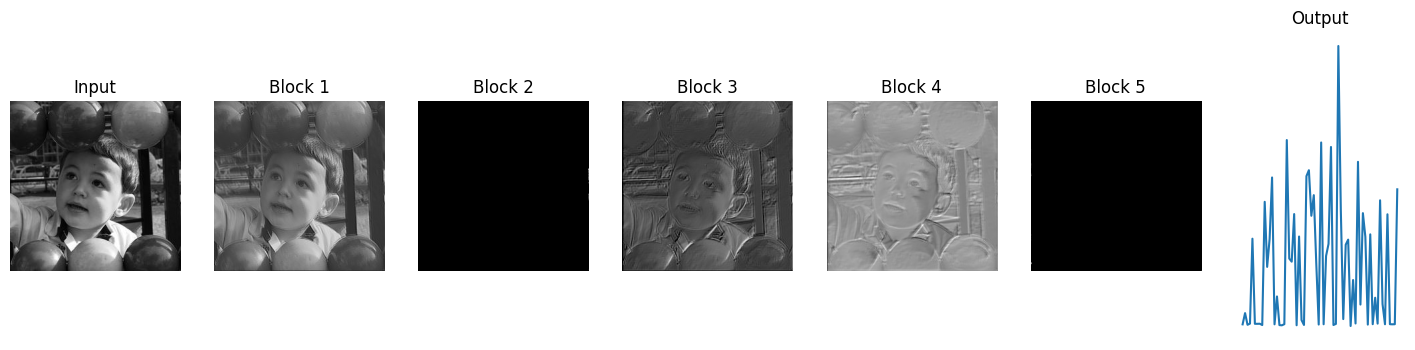


Activation Used: tanh
Output Vector Shape: torch.Size([1, 64])


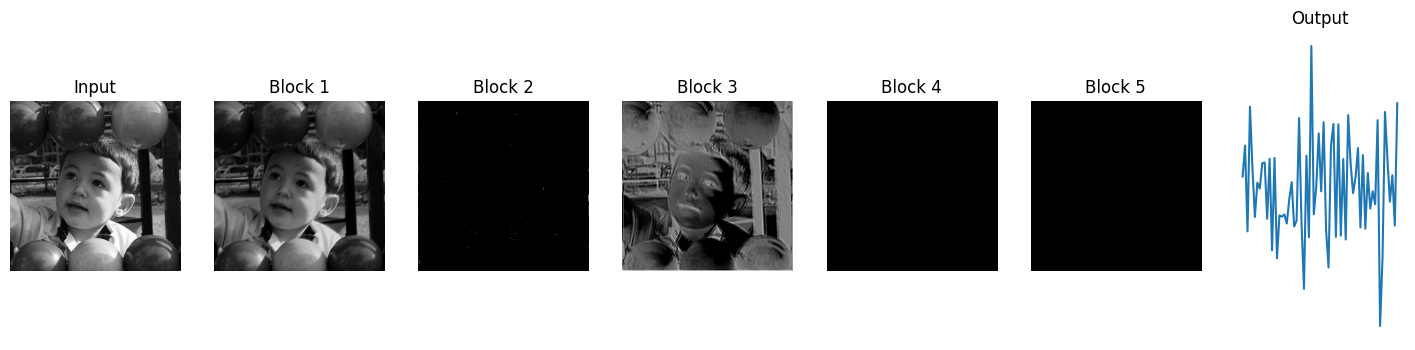

In [46]:
# -------------------------
# Execute
# -------------------------

run_model("021.jpg", "relu")
run_model("021.jpg", "leakyrelu")
run_model("021.jpg", "tanh")


the all black images mean that the model has learned nothing in that convulution pass


 Graph Meaning : it is the values of the final neurons on the CNN final output

Each bar = one neuron output.

Height = activation strength.

High bar  :  Model strongly detected some feature.

Low bar   :   Feature not present.


Activation Used: relu
Output Vector Shape: torch.Size([1, 64])


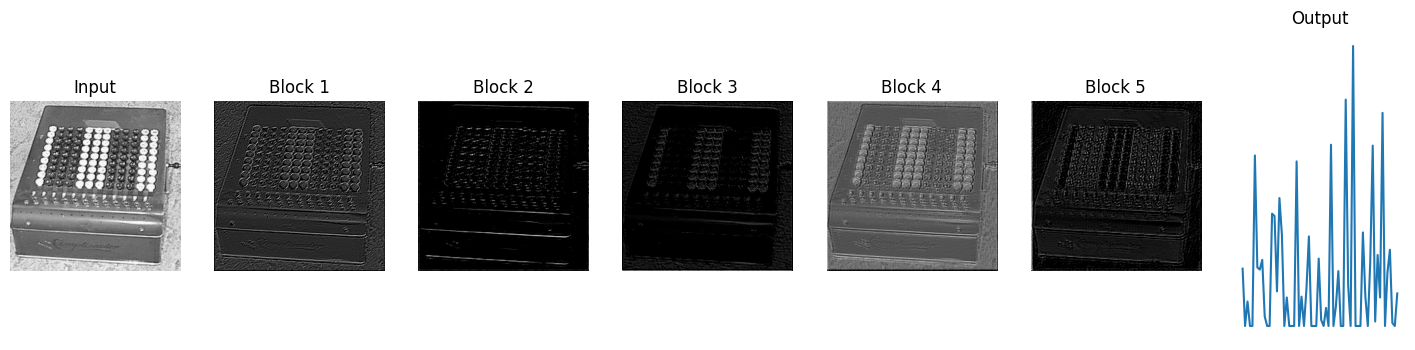


Activation Used: leakyrelu
Output Vector Shape: torch.Size([1, 64])


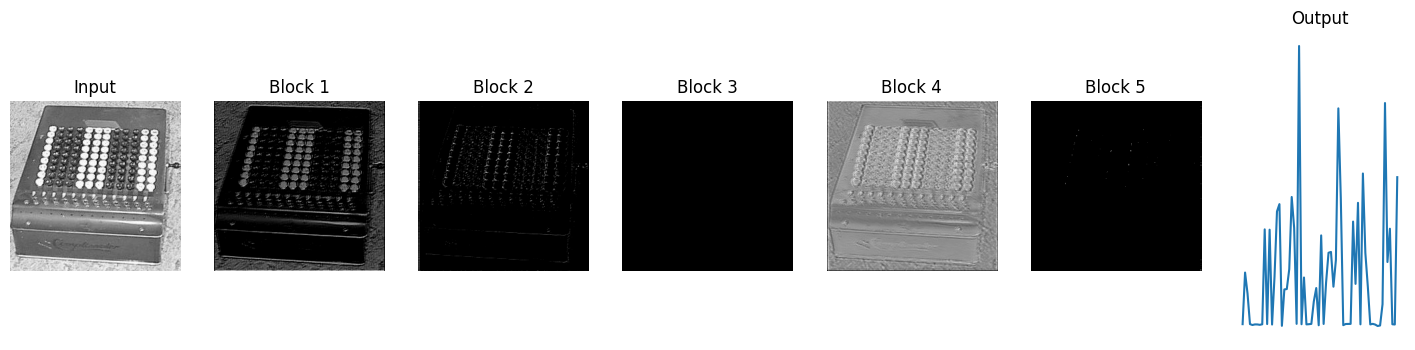


Activation Used: tanh
Output Vector Shape: torch.Size([1, 64])


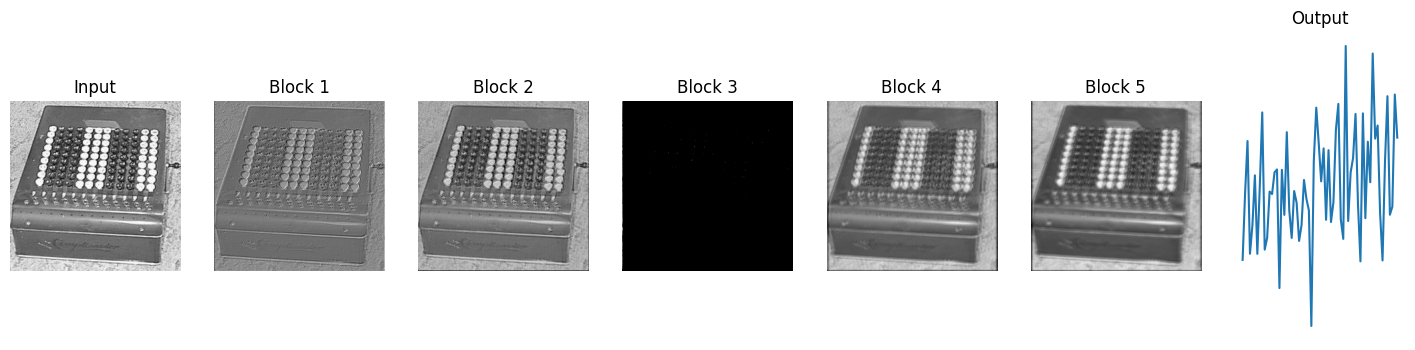

In [45]:
# -------------------------
# Execute
# -------------------------

run_model("005.jpg", "relu")
run_model("005.jpg", "leakyrelu")
run_model("005.jpg", "tanh")



Activation Used: relu
Output Vector Shape: torch.Size([1, 64])


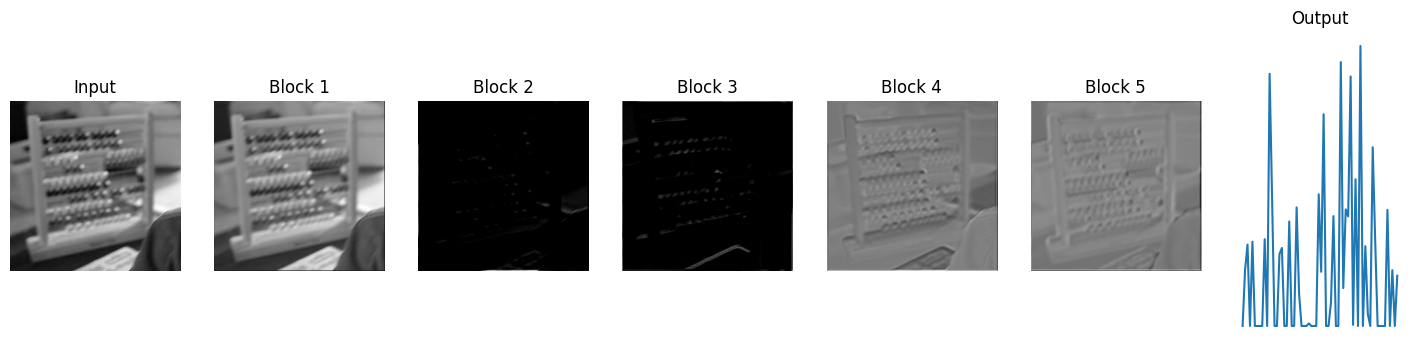


Activation Used: leakyrelu
Output Vector Shape: torch.Size([1, 64])


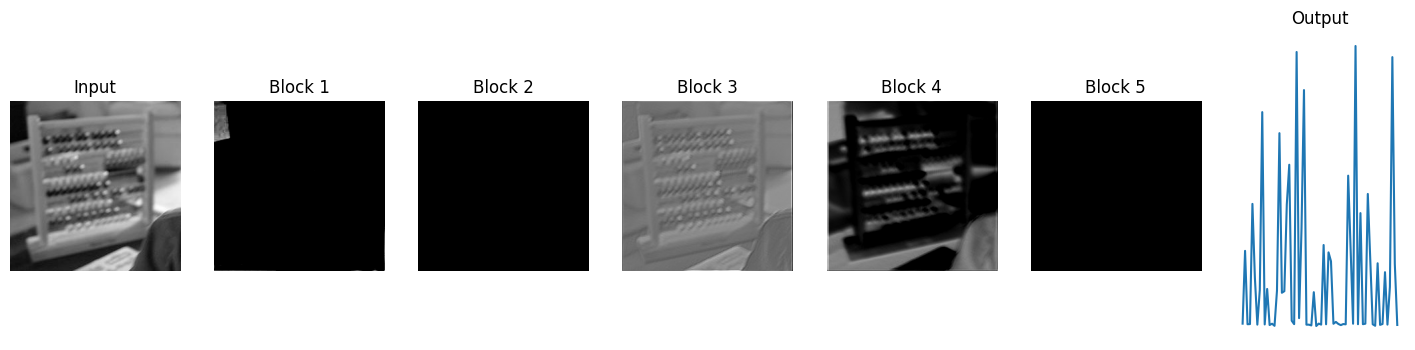


Activation Used: tanh
Output Vector Shape: torch.Size([1, 64])


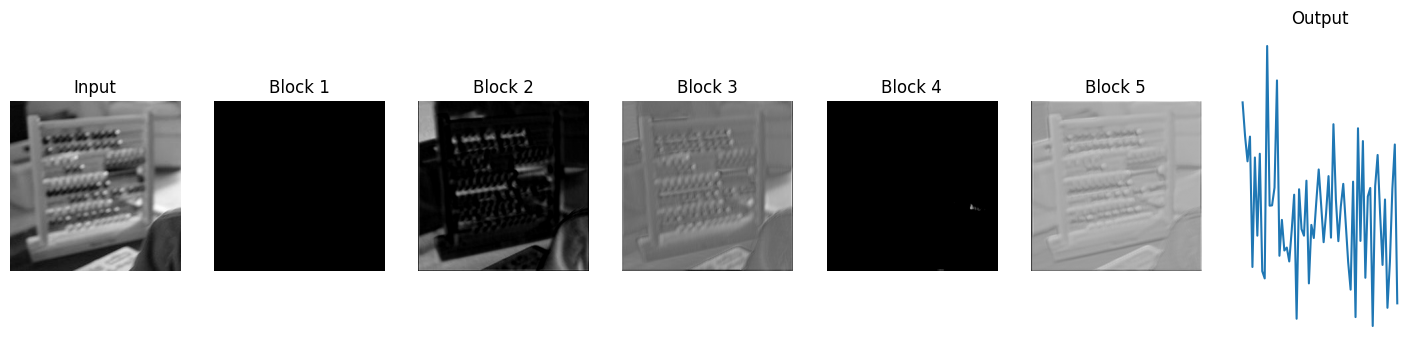

In [44]:
# -------------------------
# Execute
# -------------------------

run_model("004.jpg", "relu")
run_model("004.jpg", "leakyrelu")
run_model("004.jpg", "tanh")



Activation Used: relu
Output Vector Shape: torch.Size([1, 64])


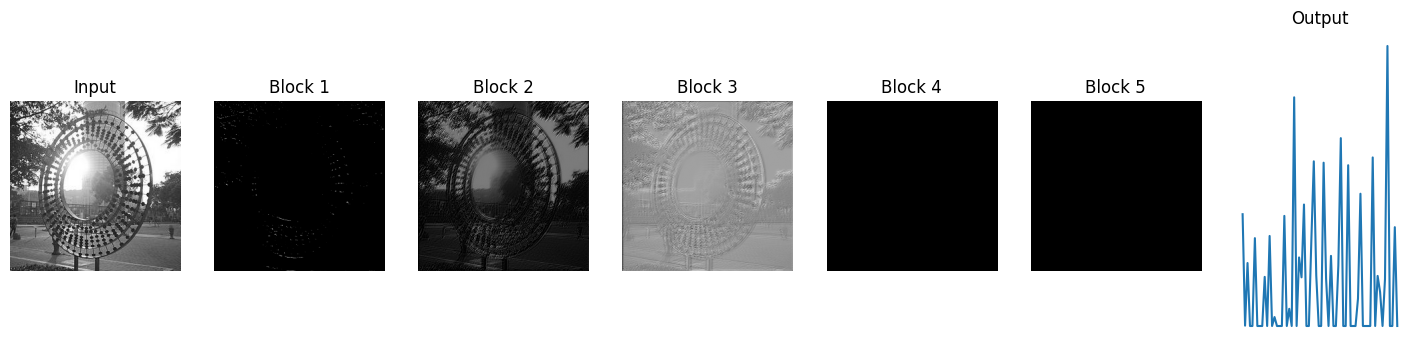


Activation Used: leakyrelu
Output Vector Shape: torch.Size([1, 64])


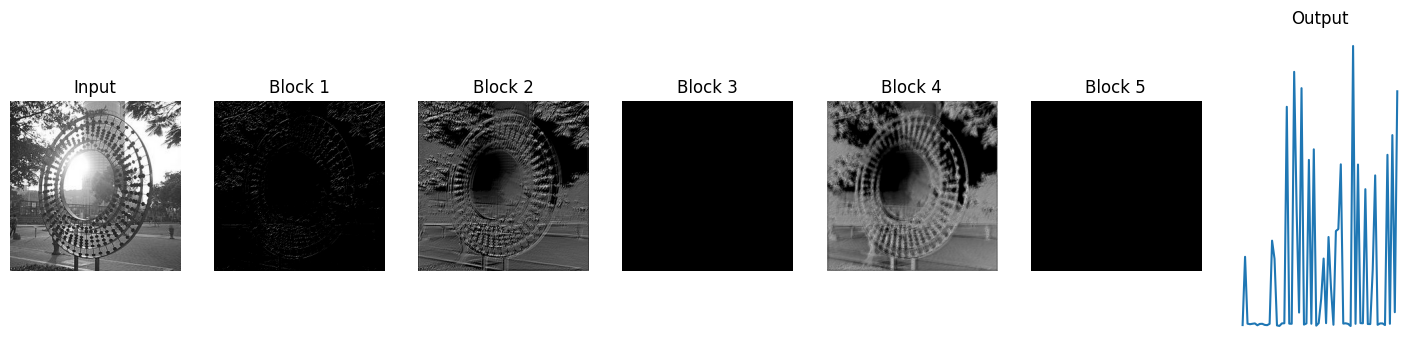


Activation Used: tanh
Output Vector Shape: torch.Size([1, 64])


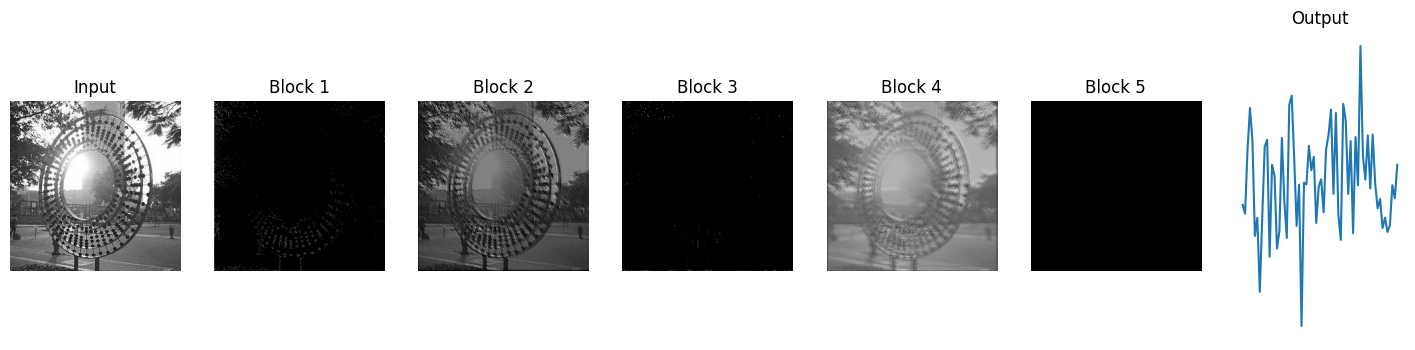

In [47]:
# -------------------------
# Execute
# -------------------------

run_model("057.jpg", "relu")
run_model("057.jpg", "leakyrelu")
run_model("057.jpg", "tanh")
